In [1]:
#checking the ta-lib installation is correct

import talib
print("TA-Lib version:", talib.__version__)


TA-Lib version: 0.5.1


In [2]:
import sys
import os

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

# Importing the module
import finance_utils as fu

# Loading stock price data
file_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-01\\data\\AAPL_historical_data.csv'
stock_data = fu.load_stock_data(file_path)

# Prepare the data
prepared_data = fu.prepare_stock_data(stock_data) 


# Display the first few rows of the processed data
print(prepared_data.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [14]:
# Import the module
import technical_analysis_indicator as ta

# Add a 20-day Simple Moving Average (SMA) to the prepared data
prepared_data = ta.add_sma(prepared_data, period=20)

# Add a 14-day Relative Strength Index (RSI) to the prepared data
prepared_data = ta.add_rsi(prepared_data, period=14)

# Add Bollinger Bands to the prepared data
prepared_data = ta.add_bollinger_bands(prepared_data, period=20)

# Add MACD to the prepared data
prepared_data = ta.add_macd(prepared_data)


# To handle NaN values
prepared_data = prepared_data.dropna()

# Display the first few rows
print(prepared_data.head(10))


         Date      Open      High       Low     Close  Adj Close    Volume  \
52 1981-02-27  0.118304  0.119420  0.118304  0.118304   0.091200  14761600   
53 1981-03-02  0.118862  0.119420  0.118862  0.118862   0.091630  11760000   
54 1981-03-03  0.117746  0.117746  0.117188  0.117188   0.090340  16172800   
55 1981-03-04  0.116629  0.116629  0.116071  0.116071   0.089479  13708800   
56 1981-03-05  0.116071  0.116071  0.115513  0.115513   0.089049   5376000   
57 1981-03-06  0.115513  0.115513  0.114397  0.114397   0.088188  11603200   
58 1981-03-09  0.106027  0.106027  0.105469  0.105469   0.081306  15321600   
59 1981-03-10  0.101004  0.101004  0.100446  0.100446   0.077434  28380800   
60 1981-03-11  0.097656  0.097656  0.096540  0.096540   0.074422  29859200   
61 1981-03-12  0.100446  0.101004  0.100446  0.100446   0.077434  59248000   

    Dividends  Stock Splits    SMA_20        RSI  BB_upper  BB_middle  \
52        0.0           0.0  0.118304  46.105308  0.131034   0.11830

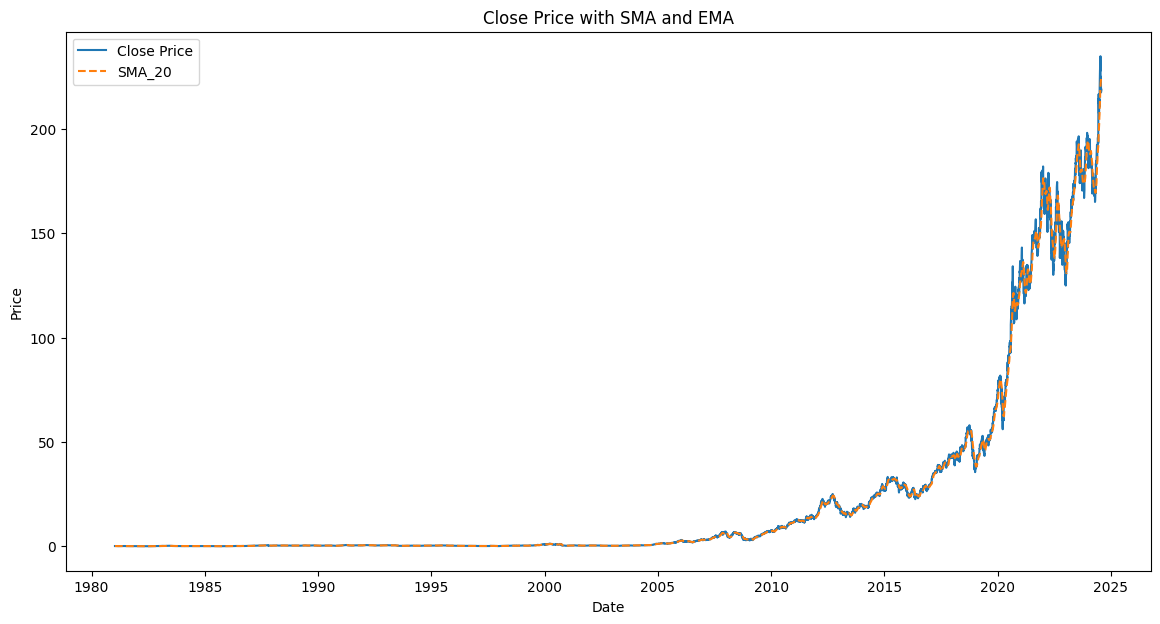

In [10]:
import visualization_utils as vu

vu.plot_close_with_moving_averages(prepared_data)


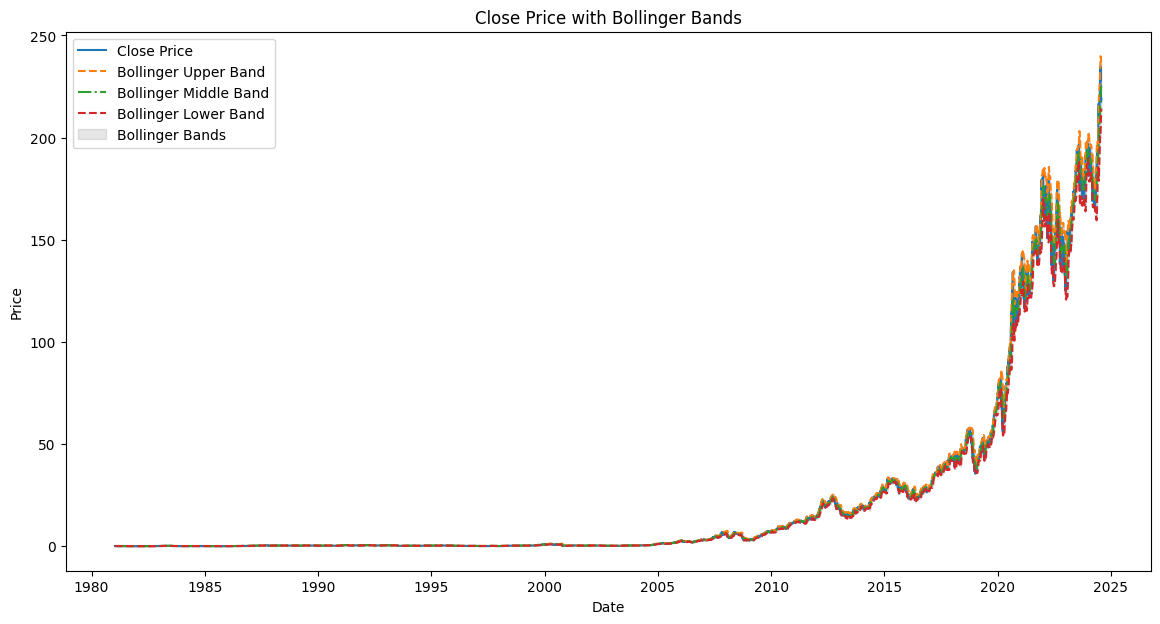

In [11]:
vu.plot_bollinger_bands(prepared_data)



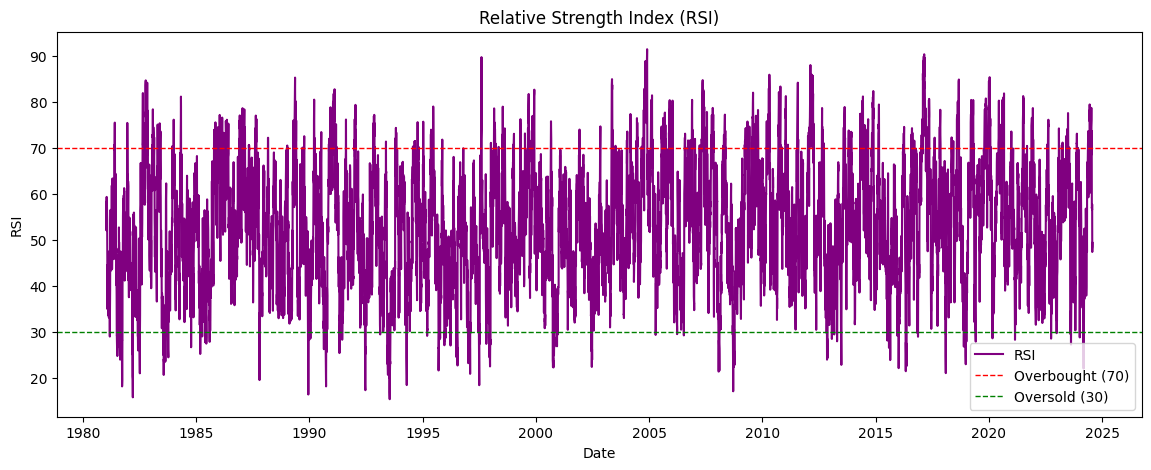

In [12]:
vu.plot_rsi(prepared_data)

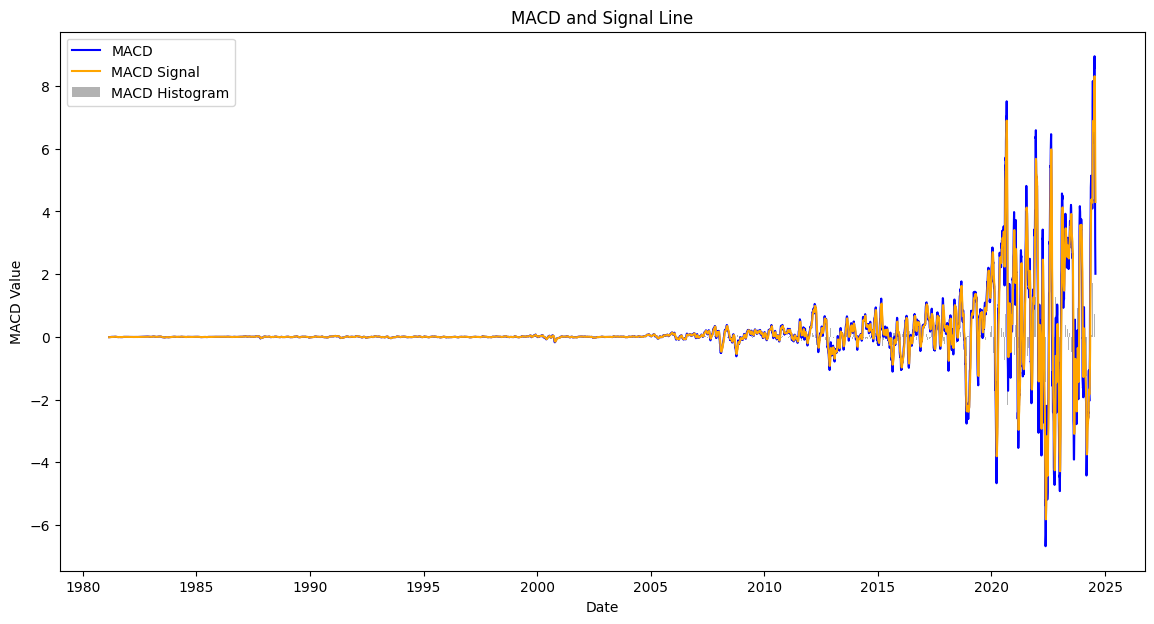

In [15]:
vu.plot_macd(prepared_data)

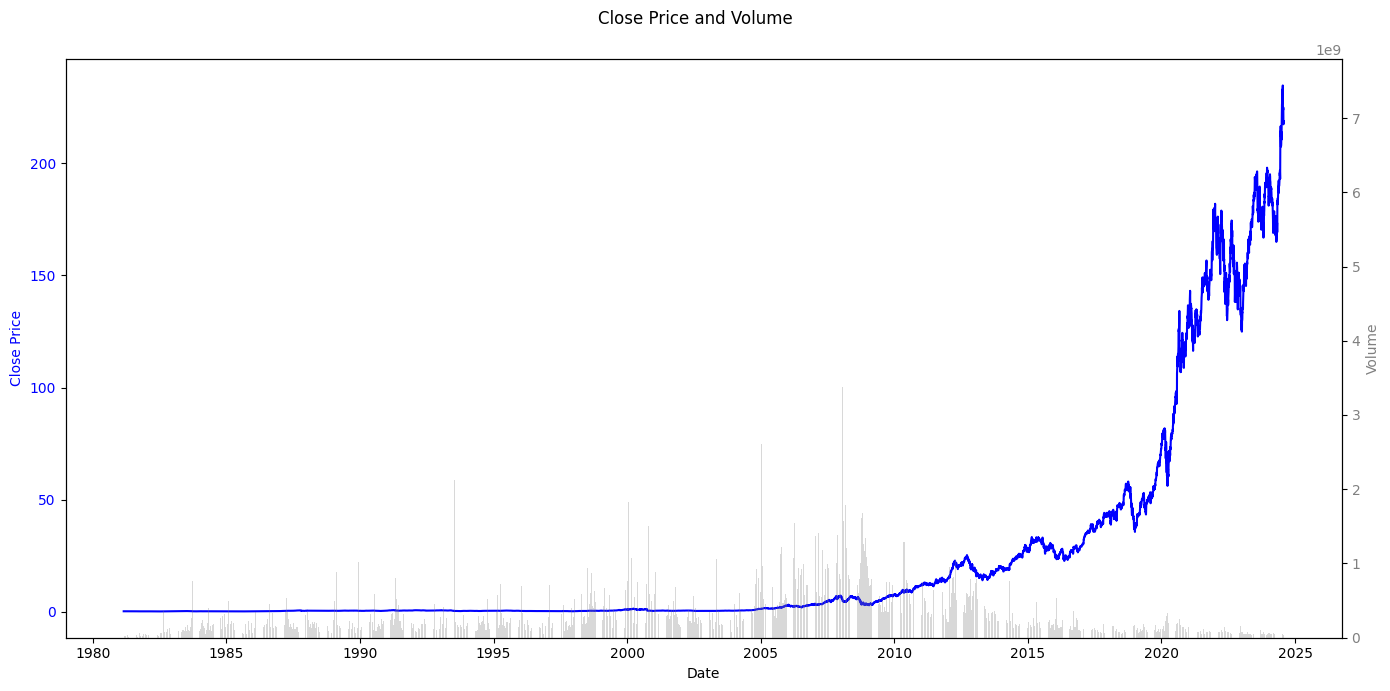

In [16]:
vu.plot_close_and_volume(prepared_data)